In [1]:
# 다중분류 문제
# 로이터 뉴스를 46개 상호 배타적인 토픽으로 분류하는 신경망 (단일 레이블 다중 분류)

In [2]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words= 10000) # 가장 많이 등장하는 단어 1만개
print(train_data[0])# 정수 리스트

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for key,value in word_index.items()])
decode_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decode_newswire # 0,1,2 패딩, 문서시작, 사전 없음을 제외하고 인덱스를 단어로 디코딩

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
# 벡터화 원핫 인코딩 => 범주형 데이터에 많이 쓰인다.
import numpy as np
def vec_seq(sequences,dim=10000):
    res = np.zeros((len(sequences),dim)) 
    for i,seq in enumerate(sequences):
        res[i,seq] = 1.
    return res
x_train = vec_seq(train_data)
x_test = vec_seq(test_data)

In [5]:
one_hot_train_labels = vec_seq(train_labels,46)
one_hot_test_labels = vec_seq(test_labels,46)
# 함수를 정의해도 되지만 keras에서는 내장함수가 이미 있다.
# from keras.utils.np_utils import to_categorical

In [6]:
x_train.shape,x_test.shape

((8982, 10000), (2246, 10000))

In [7]:
from keras import layers,models

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
# 출력 클래스 46개 
# 46개 클래스를 분류할 때는 은닉 유닛을 46개 보다 크게 만들어 유용한 정보를 잃지 않게해야함(정보의 병목 방지)
# softmax 확률 출력

In [8]:
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
# 손실함수 categorical_crossentropy
# 두 확률 분포사이의 거리를 측정 ( 네트워크가 출력한 확률 분포와 진짜 레이블의 분포사이 거리)
# 두 분포 사이의 거리를 최소화하면 진짜 레이블에 가가운 출력을 내도록 훈련

In [9]:
x_val = x_train[:1000]
x_part = x_train[1000:]
y_val = one_hot_train_labels[:1000]
y_part = one_hot_train_labels[1000:]

In [10]:
history = model.fit(x_part,y_part,epochs=20,batch_size = 512, validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 35ms/step - loss: 2.6012 - accuracy: 0.5227 - val_loss: 1.7265 - val_accuracy: 0.6520
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.4308 - accuracy: 0.7097 - val_loss: 1.2994 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 23ms/step - loss: 1.0689 - accuracy: 0.7741 - val_loss: 1.1358 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8476 - accuracy: 0.8254 - val_loss: 1.0228 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6761 - accuracy: 0.8609 - val_loss: 0.9805 - val_accuracy: 0.7840
Epoch 6/20
16/16 [==============================] - 0s 23ms/step - loss: 0.5458 - accuracy: 0.8874 - val_loss: 0.9207 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 0.4398 - accuracy: 0.9067 - val_loss: 0.9120 - val_accuracy: 0.8000
Epoch 8/20
16

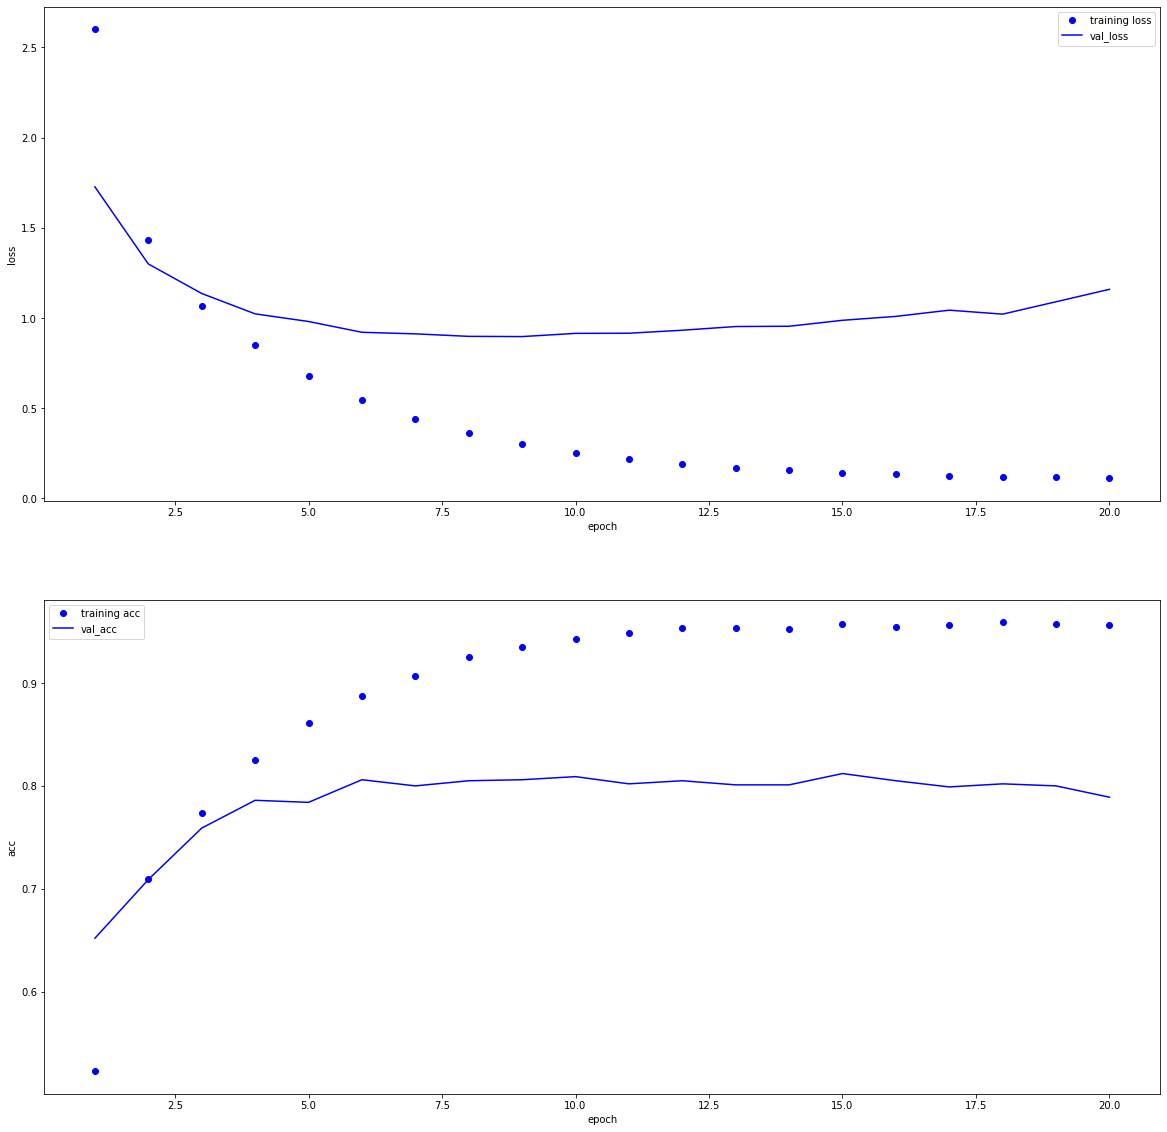

In [11]:
# 손실과 정확도 그래프
import matplotlib.pyplot as plt
def plot_loss_acc(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1,len(loss)+1)

    plt.figure(figsize =(20,20))
    plt.subplot(2,1,1)
    plt.plot(epochs,loss,'bo',label= 'training loss')
    plt.plot(epochs,val_loss,'b',label='val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(epochs,acc,'bo',label= 'training acc')
    plt.plot(epochs,val_acc,'b',label='val_acc')
    plt.xlabel('epoch')
    plt.ylabel('acc')
    plt.legend()
    plt.show()
plot_loss_acc(history)

In [12]:
# 9번째 epochs 과대 적합 시작?
# 4번재 epochs 과대 적합 시작?
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=9,batch_size = 512, validation_data = (x_val,y_val))
model.evaluate(x_test,one_hot_test_labels) # 정확도 78.2%

Epoch 1/9
16/16 [==============================] - 1s 39ms/step - loss: 2.7774 - accuracy: 0.4934 - val_loss: 1.8293 - val_accuracy: 0.6230
Epoch 2/9
16/16 [==============================] - 0s 25ms/step - loss: 1.4658 - accuracy: 0.6956 - val_loss: 1.3146 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 25ms/step - loss: 1.0569 - accuracy: 0.7747 - val_loss: 1.1143 - val_accuracy: 0.7480
Epoch 4/9
16/16 [==============================] - 0s 25ms/step - loss: 0.8217 - accuracy: 0.8272 - val_loss: 1.0038 - val_accuracy: 0.7910
Epoch 5/9
16/16 [==============================] - 0s 26ms/step - loss: 0.6492 - accuracy: 0.8707 - val_loss: 0.9884 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 0s 25ms/step - loss: 0.5203 - accuracy: 0.8944 - val_loss: 0.9102 - val_accuracy: 0.8140
Epoch 7/9
16/16 [==============================] - 0s 25ms/step - loss: 0.4213 - accuracy: 0.9131 - val_loss: 0.8790 - val_accuracy: 0.8200
Epoch 8/9
16/16 [===

[0.9848219752311707, 0.7822796106338501]

In [13]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=4,batch_size = 512, validation_data = (x_val,y_val))
model.evaluate(x_test,one_hot_test_labels) # 정확도 75.2%

Epoch 1/4
16/16 [==============================] - 1s 36ms/step - loss: 2.5008 - accuracy: 0.5155 - val_loss: 1.6533 - val_accuracy: 0.6460
Epoch 2/4
16/16 [==============================] - 0s 25ms/step - loss: 1.3866 - accuracy: 0.7103 - val_loss: 1.2727 - val_accuracy: 0.7180
Epoch 3/4
16/16 [==============================] - 0s 24ms/step - loss: 1.0301 - accuracy: 0.7818 - val_loss: 1.1049 - val_accuracy: 0.7730
Epoch 4/4
71/71 [==============================] - 0s 2ms/step - loss: 1.0947 - accuracy: 0.7582


[1.0947462320327759, 0.7582368850708008]

In [14]:
# 훈련데이터와 검증데이터의 정확도 그래프에서 분기되는 epochs의 개수가 4인 점으로 모델을 실행결과 정확도 74%
# 최적점은 과소적합, 과대적합의 중간점이다 => 검증 데이터 정확도가 증가하다가 감소하기 바로 전이 최적점
# epochs 4는 과소적합이라고 볼 수 있어 정확도가 낮게나왔다!

In [15]:
# 충분히 큰 중간층을 둬야하는 이유 : 정보 병목 현상
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=20,batch_size = 512, validation_data = (x_val,y_val))
model.evaluate(x_test,one_hot_test_labels) # 정확도의 감소 68% 이유 : 많은 정보를 중간층의 저차원 표현 공간으로 압축하려고 했기 때문
# 필요한 정보 대부분을 4차원 표현 안에 구겨넣었지만 전부 넣지 못했다!

Epoch 1/20
16/16 [==============================] - 1s 33ms/step - loss: 3.4779 - accuracy: 0.2591 - val_loss: 3.0630 - val_accuracy: 0.5500
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 2.7509 - accuracy: 0.5772 - val_loss: 2.4713 - val_accuracy: 0.5840
Epoch 3/20
16/16 [==============================] - 0s 27ms/step - loss: 2.1917 - accuracy: 0.5986 - val_loss: 2.0259 - val_accuracy: 0.5990
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 1.8071 - accuracy: 0.6175 - val_loss: 1.7641 - val_accuracy: 0.6150
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 1.5699 - accuracy: 0.6475 - val_loss: 1.6230 - val_accuracy: 0.6460
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 1.4139 - accuracy: 0.6822 - val_loss: 1.5249 - val_accuracy: 0.6700
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 1.3003 - accuracy: 0.7067 - val_loss: 1.4649 - val_accuracy: 0.6730
Epoch 8/20
16

[1.4974451065063477, 0.6803205609321594]

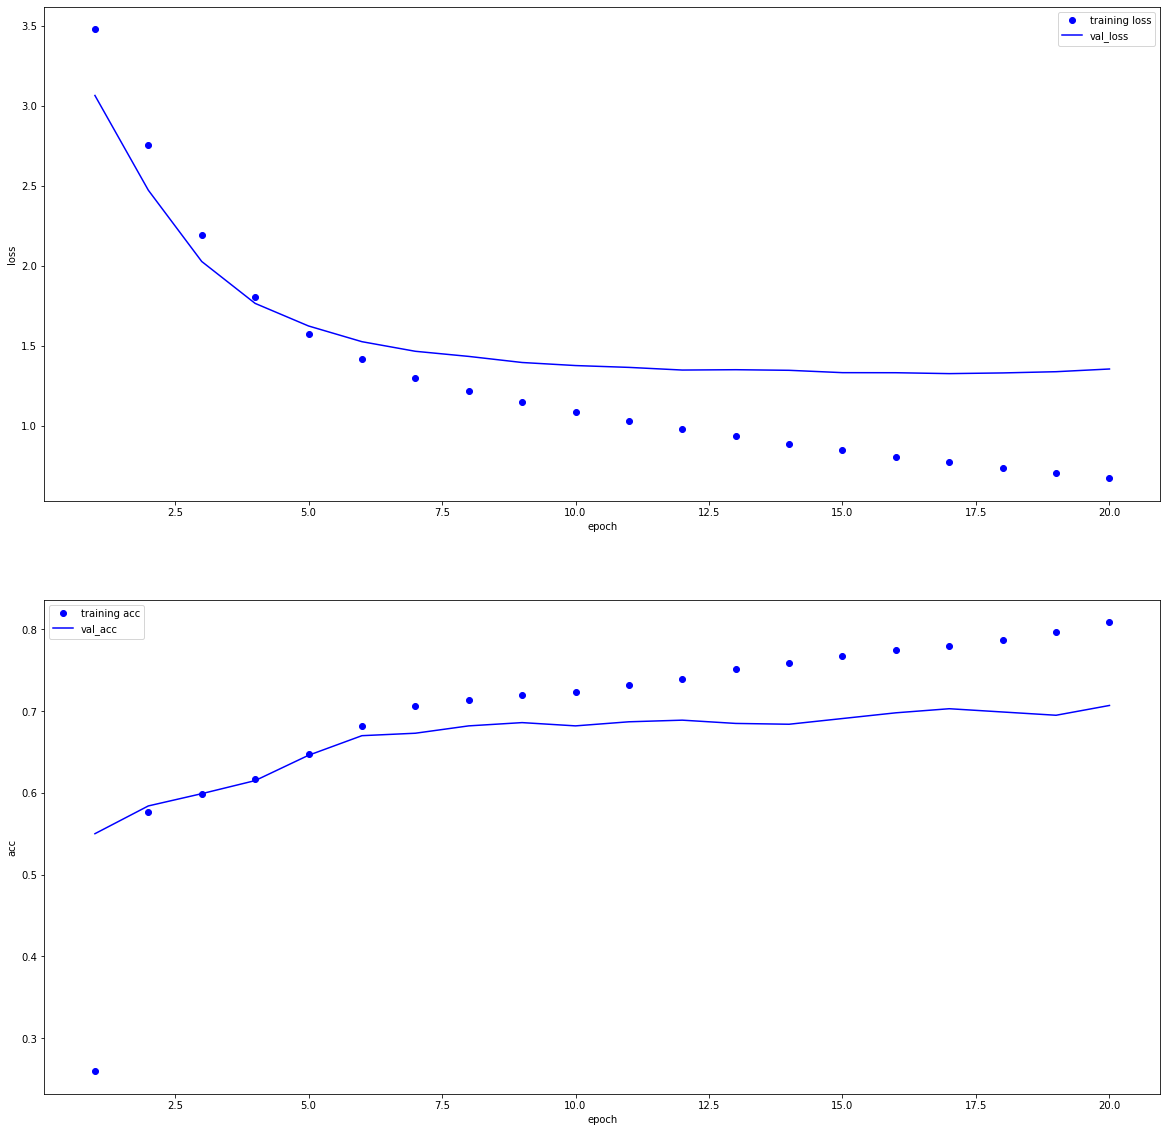

In [16]:
plot_loss_acc(history)

Epoch 1/20
16/16 [==============================] - 1s 50ms/step - loss: 2.0935 - accuracy: 0.5648 - val_loss: 1.3689 - val_accuracy: 0.6850
Epoch 2/20
16/16 [==============================] - 1s 39ms/step - loss: 1.1002 - accuracy: 0.7577 - val_loss: 1.1066 - val_accuracy: 0.7540
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 0.7849 - accuracy: 0.8300 - val_loss: 1.0125 - val_accuracy: 0.7710
Epoch 4/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5789 - accuracy: 0.8756 - val_loss: 0.9279 - val_accuracy: 0.8020
Epoch 5/20
16/16 [==============================] - 1s 38ms/step - loss: 0.4161 - accuracy: 0.9109 - val_loss: 0.9630 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 1s 38ms/step - loss: 0.3261 - accuracy: 0.9298 - val_loss: 0.9028 - val_accuracy: 0.8160
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 0.2507 - accuracy: 0.9421 - val_loss: 0.9136 - val_accuracy: 0.8170
Epoch 8/20
16

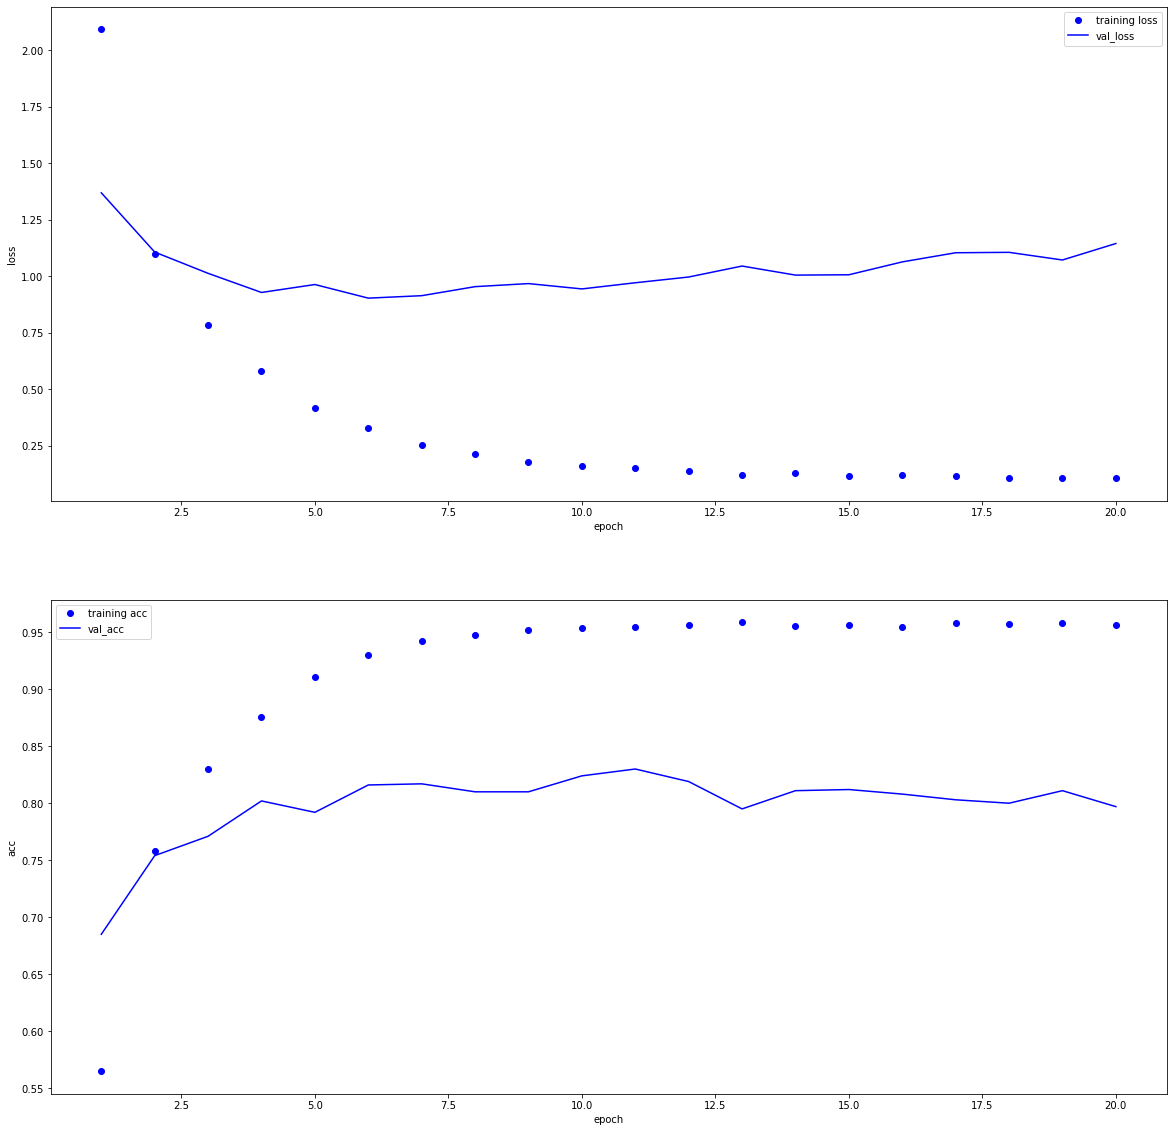

In [17]:
# 은닉 유닛의 개수 변화 128개로 증가
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=20,batch_size = 512, validation_data = (x_val,y_val))
print(model.evaluate(x_test,one_hot_test_labels))
plot_loss_acc(history)

In [18]:
# 최적 epochs = 8 
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=8,batch_size = 512, validation_data = (x_val,y_val))
print(model.evaluate(x_test,one_hot_test_labels)) # 정확도 79.6% 기존 은닉 유닛 64개(78.2) 일 때와 비교했을 때 정확도 1.4% 상승

Epoch 1/8
16/16 [==============================] - 1s 50ms/step - loss: 2.1805 - accuracy: 0.5552 - val_loss: 1.4215 - val_accuracy: 0.7040
Epoch 2/8
16/16 [==============================] - 1s 40ms/step - loss: 1.1359 - accuracy: 0.7558 - val_loss: 1.1269 - val_accuracy: 0.7480
Epoch 3/8
16/16 [==============================] - 1s 39ms/step - loss: 0.7981 - accuracy: 0.8262 - val_loss: 0.9803 - val_accuracy: 0.7980
Epoch 4/8
16/16 [==============================] - 1s 41ms/step - loss: 0.5777 - accuracy: 0.8763 - val_loss: 0.9054 - val_accuracy: 0.8100
Epoch 5/8
16/16 [==============================] - 1s 40ms/step - loss: 0.4174 - accuracy: 0.9131 - val_loss: 0.8594 - val_accuracy: 0.8120
Epoch 6/8
16/16 [==============================] - 1s 39ms/step - loss: 0.3133 - accuracy: 0.9323 - val_loss: 0.8977 - val_accuracy: 0.8120
Epoch 7/8
16/16 [==============================] - 1s 40ms/step - loss: 0.2468 - accuracy: 0.9444 - val_loss: 0.8720 - val_accuracy: 0.8190
Epoch 8/8
71/71 [===

Epoch 1/20
16/16 [==============================] - 0s 27ms/step - loss: 3.0156 - accuracy: 0.4669 - val_loss: 2.3189 - val_accuracy: 0.5580
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.9647 - accuracy: 0.6134 - val_loss: 1.7364 - val_accuracy: 0.6220
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5130 - accuracy: 0.6787 - val_loss: 1.4609 - val_accuracy: 0.6770
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 1.2526 - accuracy: 0.7330 - val_loss: 1.3118 - val_accuracy: 0.7210
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0696 - accuracy: 0.7774 - val_loss: 1.2187 - val_accuracy: 0.7320
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.9235 - accuracy: 0.8046 - val_loss: 1.1373 - val_accuracy: 0.7650
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8010 - accuracy: 0.8257 - val_loss: 1.0797 - val_accuracy: 0.7760
Epoch 8/20
16

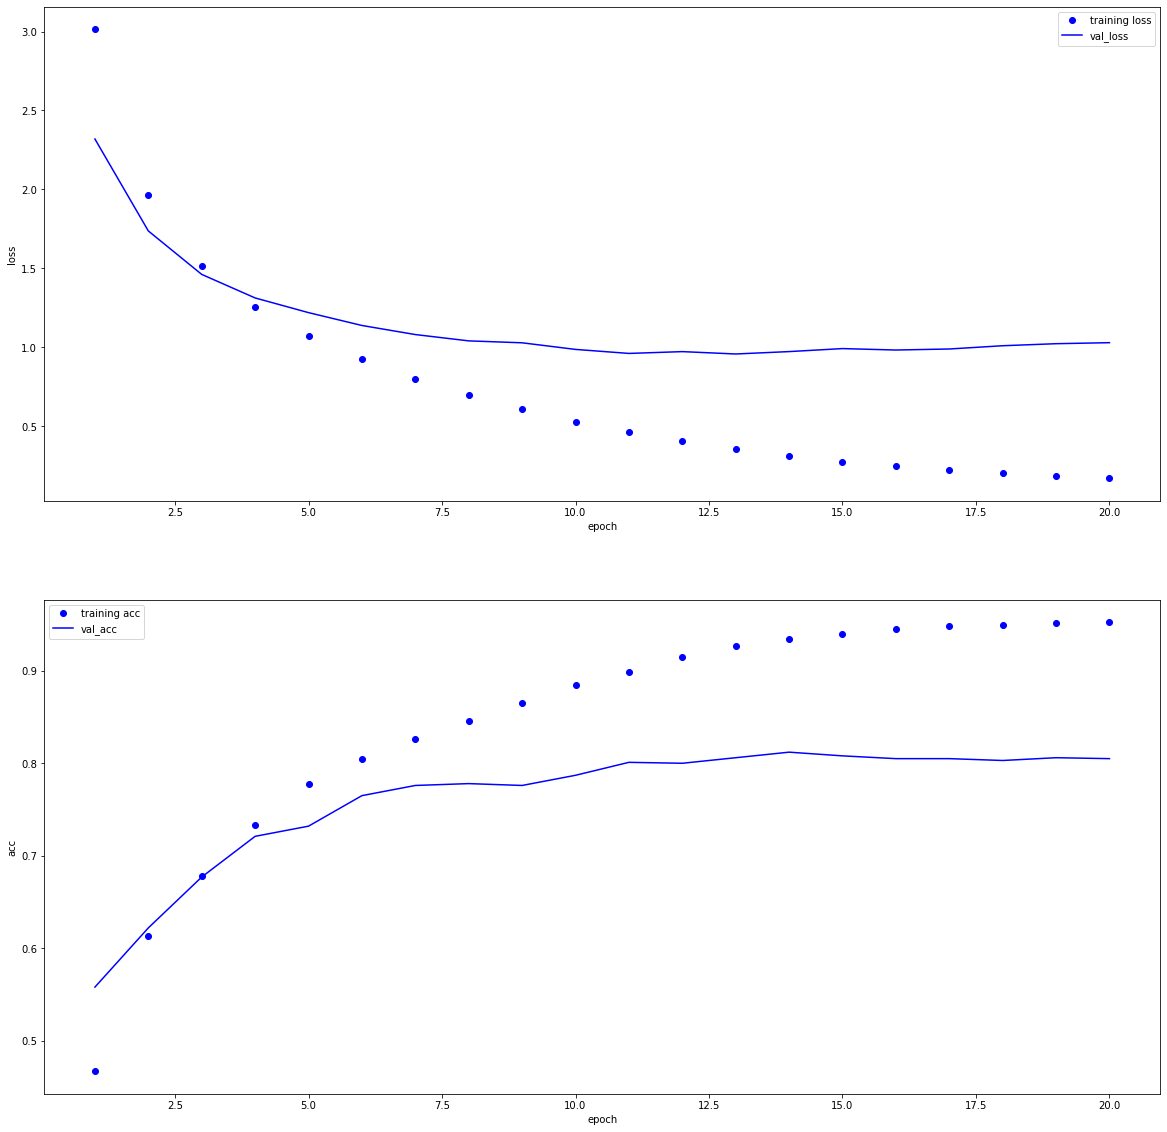

In [19]:
# 은닉 유닛 32
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=20,batch_size = 512, validation_data = (x_val,y_val))
print(model.evaluate(x_test,one_hot_test_labels))
plot_loss_acc(history)

In [20]:
# 최적 epoch = 13
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=13,batch_size = 512, validation_data = (x_val,y_val))
print(model.evaluate(x_test,one_hot_test_labels)) # 정확도 77.6% 유닛을 증가시켰을 때보다 정확도가 낮게 나왔고 2.3% 차이였다.
# 정확도 그래프를 보면 val_acc은 epochs 10에서 금방 안정되는 것을 보임 정확도를 증가시키는 정보 또는 감소시키는 요소가 손실되보인다.
# 결론 출력보다 큰 충분한 은닉 유닛이 필요하다~

Epoch 1/13
16/16 [==============================] - 1s 31ms/step - loss: 2.9716 - accuracy: 0.3909 - val_loss: 2.2289 - val_accuracy: 0.5740
Epoch 2/13
16/16 [==============================] - 0s 19ms/step - loss: 1.8545 - accuracy: 0.6407 - val_loss: 1.6166 - val_accuracy: 0.6640
Epoch 3/13
16/16 [==============================] - 0s 17ms/step - loss: 1.3769 - accuracy: 0.7187 - val_loss: 1.3468 - val_accuracy: 0.7020
Epoch 4/13
16/16 [==============================] - 0s 19ms/step - loss: 1.1157 - accuracy: 0.7672 - val_loss: 1.2063 - val_accuracy: 0.7380
Epoch 5/13
16/16 [==============================] - 0s 18ms/step - loss: 0.9411 - accuracy: 0.7994 - val_loss: 1.1222 - val_accuracy: 0.7630
Epoch 6/13
16/16 [==============================] - 0s 17ms/step - loss: 0.8094 - accuracy: 0.8270 - val_loss: 1.0699 - val_accuracy: 0.7730
Epoch 7/13
16/16 [==============================] - 0s 18ms/step - loss: 0.7009 - accuracy: 0.8482 - val_loss: 1.0227 - val_accuracy: 0.7930
Epoch 8/13
16

Epoch 1/20
16/16 [==============================] - 1s 64ms/step - loss: 2.4828 - accuracy: 0.3866 - val_loss: 1.6639 - val_accuracy: 0.5750
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.5170 - accuracy: 0.6279 - val_loss: 1.4572 - val_accuracy: 0.6420
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.1698 - accuracy: 0.7090 - val_loss: 1.2378 - val_accuracy: 0.6990
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.9855 - accuracy: 0.7442 - val_loss: 1.1448 - val_accuracy: 0.7200
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8287 - accuracy: 0.7794 - val_loss: 1.1259 - val_accuracy: 0.7460
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6626 - accuracy: 0.8274 - val_loss: 1.2903 - val_accuracy: 0.7470
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5894 - accuracy: 0.8436 - val_loss: 1.1158 - val_accuracy: 0.7640
Epoch 8/20
16

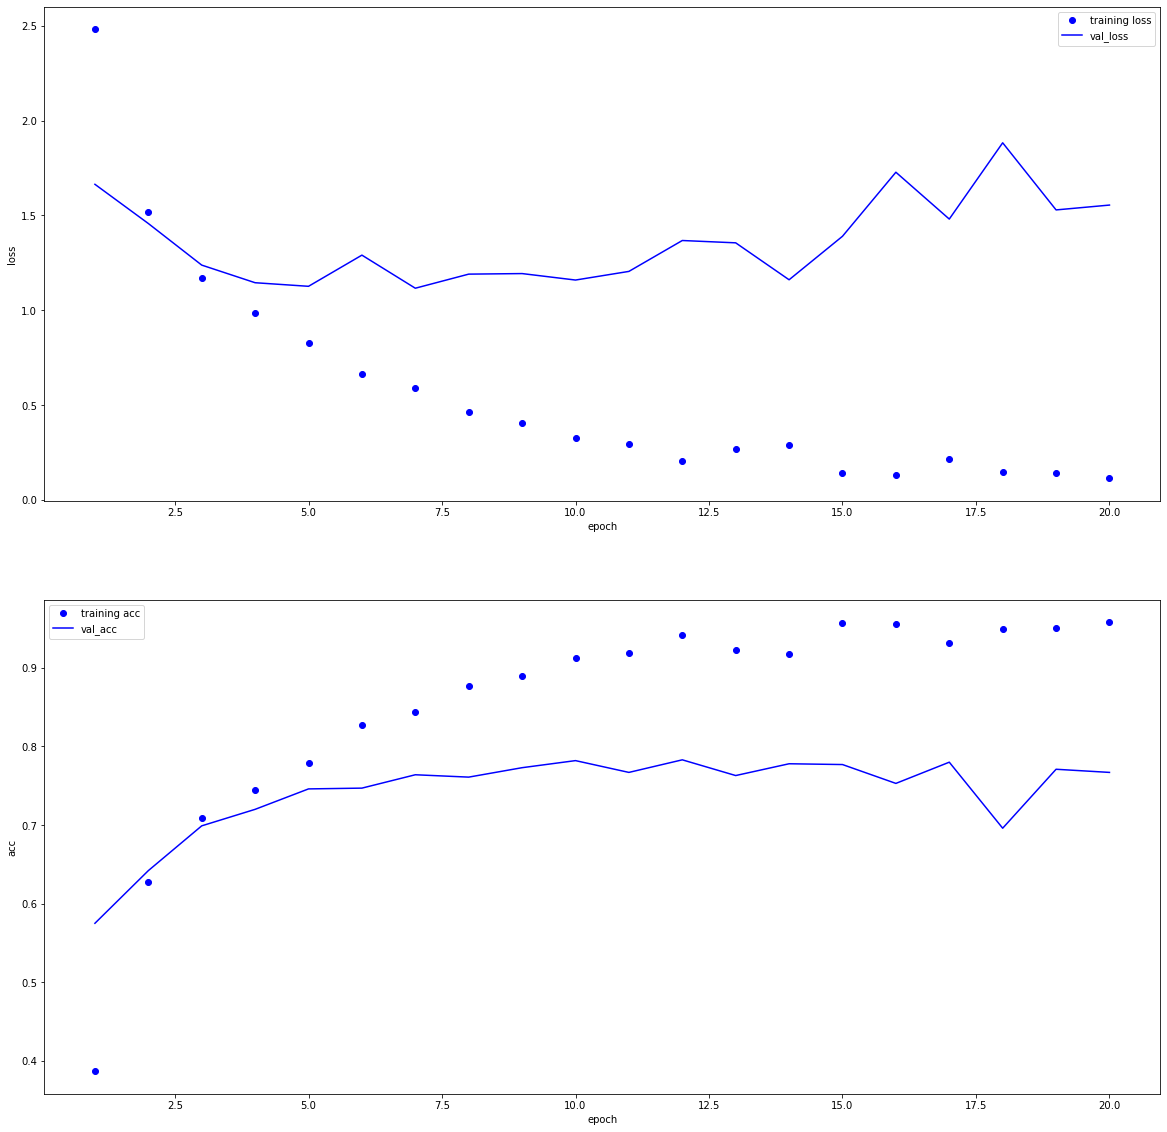

In [21]:
# 은닉층의 변화에 따른 정확도 변화 은닉층 8개
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=20,batch_size = 512, validation_data = (x_val,y_val))
print(model.evaluate(x_test,one_hot_test_labels))
plot_loss_acc(history)

In [22]:
# epochs = 10
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=10,batch_size = 512, validation_data = (x_val,y_val))
print(model.evaluate(x_test,one_hot_test_labels)) # 정확도 75.2% 은닉층2개(78.2) 보다 작게나왔다

Epoch 1/10
16/16 [==============================] - 1s 75ms/step - loss: 2.5420 - accuracy: 0.3558 - val_loss: 1.7442 - val_accuracy: 0.5720
Epoch 2/10
16/16 [==============================] - 1s 55ms/step - loss: 1.5673 - accuracy: 0.5998 - val_loss: 1.5831 - val_accuracy: 0.5700
Epoch 3/10
16/16 [==============================] - 1s 58ms/step - loss: 1.3010 - accuracy: 0.6586 - val_loss: 1.2816 - val_accuracy: 0.6970
Epoch 4/10
16/16 [==============================] - 1s 59ms/step - loss: 1.0481 - accuracy: 0.7231 - val_loss: 1.2637 - val_accuracy: 0.7090
Epoch 5/10
16/16 [==============================] - 1s 57ms/step - loss: 0.8857 - accuracy: 0.7711 - val_loss: 1.1909 - val_accuracy: 0.7390
Epoch 6/10
16/16 [==============================] - 1s 64ms/step - loss: 0.7535 - accuracy: 0.8049 - val_loss: 1.1484 - val_accuracy: 0.7560
Epoch 7/10
16/16 [==============================] - 1s 59ms/step - loss: 0.6116 - accuracy: 0.8447 - val_loss: 1.2444 - val_accuracy: 0.7280
Epoch 8/10
16

Epoch 1/20
16/16 [==============================] - 1s 64ms/step - loss: 2.1292 - accuracy: 0.6075 - val_loss: 1.3883 - val_accuracy: 0.6990
Epoch 2/20
16/16 [==============================] - 1s 54ms/step - loss: 1.0992 - accuracy: 0.7780 - val_loss: 1.0889 - val_accuracy: 0.7680
Epoch 3/20
16/16 [==============================] - 1s 59ms/step - loss: 0.7685 - accuracy: 0.8428 - val_loss: 0.9450 - val_accuracy: 0.8080
Epoch 4/20
16/16 [==============================] - 1s 64ms/step - loss: 0.5685 - accuracy: 0.8889 - val_loss: 0.8663 - val_accuracy: 0.8140
Epoch 5/20
16/16 [==============================] - 1s 60ms/step - loss: 0.4310 - accuracy: 0.9128 - val_loss: 0.8286 - val_accuracy: 0.8260
Epoch 6/20
16/16 [==============================] - 1s 59ms/step - loss: 0.3390 - accuracy: 0.9315 - val_loss: 0.8204 - val_accuracy: 0.8220
Epoch 7/20
16/16 [==============================] - 1s 63ms/step - loss: 0.2701 - accuracy: 0.9411 - val_loss: 0.8236 - val_accuracy: 0.8230
Epoch 8/20
16

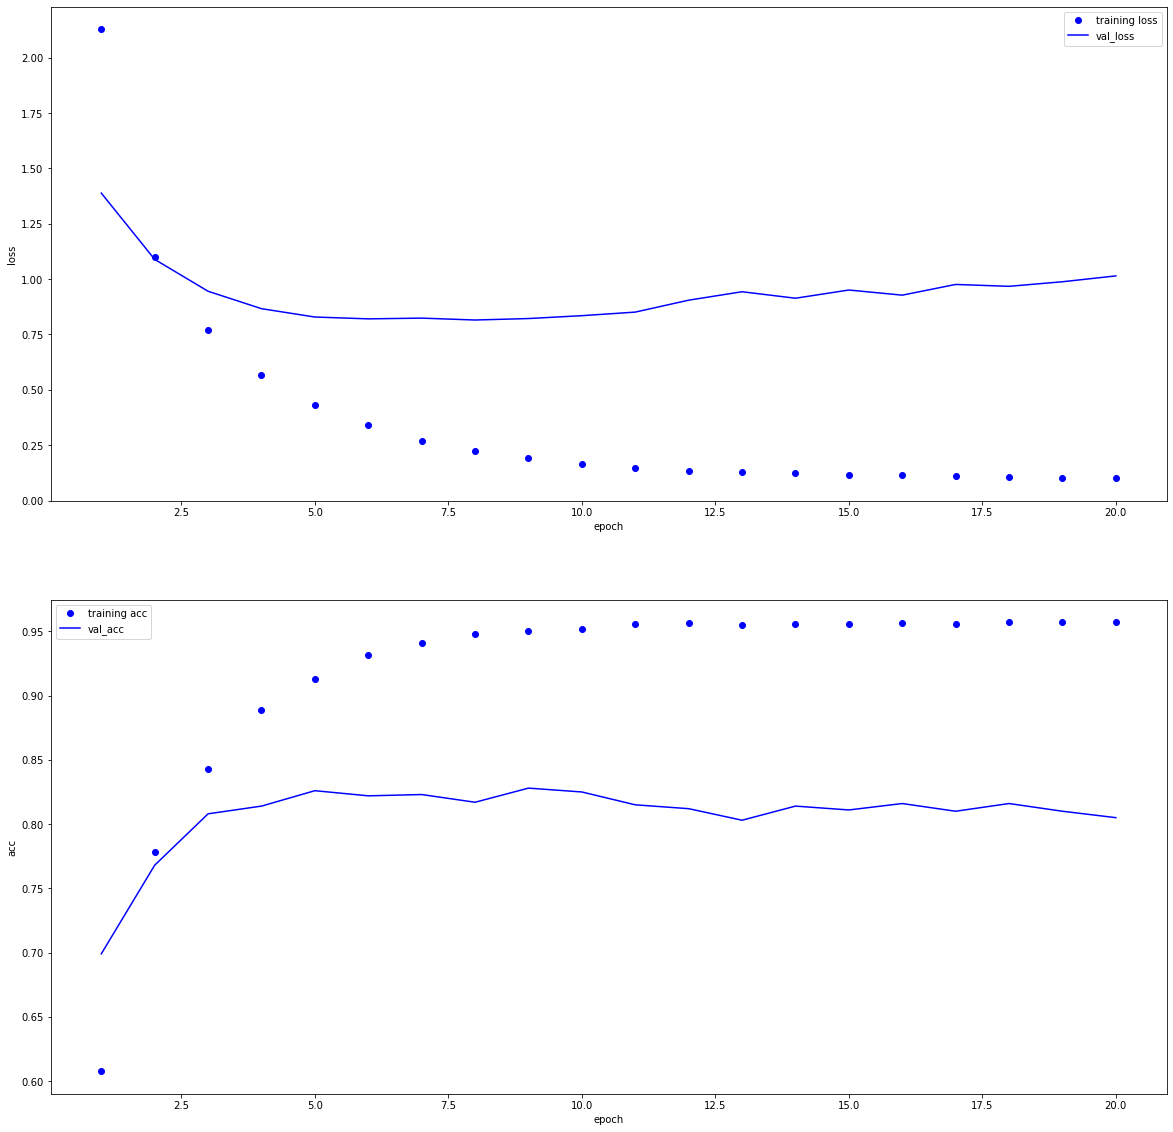

In [23]:
# 은닉층 1개
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=20,batch_size = 512, validation_data = (x_val,y_val))
print(model.evaluate(x_test,one_hot_test_labels))
plot_loss_acc(history) 

In [25]:
# 최적 epochs = 5
model = models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_part,y_part,epochs=5,batch_size = 512, validation_data = (x_val,y_val))
print(model.evaluate(x_test,one_hot_test_labels)) # 정확도 79.9% 정확도가 가장 높게 나왔다.  

Epoch 1/5
16/16 [==============================] - 1s 49ms/step - loss: 2.2380 - accuracy: 0.5947 - val_loss: 1.4655 - val_accuracy: 0.7040
Epoch 2/5
16/16 [==============================] - 1s 37ms/step - loss: 1.1421 - accuracy: 0.7716 - val_loss: 1.1131 - val_accuracy: 0.7800
Epoch 3/5
16/16 [==============================] - 1s 35ms/step - loss: 0.7864 - accuracy: 0.8404 - val_loss: 0.9597 - val_accuracy: 0.8090
Epoch 4/5
16/16 [==============================] - 1s 36ms/step - loss: 0.5798 - accuracy: 0.8845 - val_loss: 0.8964 - val_accuracy: 0.8170
Epoch 5/5
71/71 [==============================] - 0s 2ms/step - loss: 0.9113 - accuracy: 0.7996
[0.9113348722457886, 0.7996438145637512]


# 그러면 은닉층의 개수는 몇개를 하면 좋을까?
인터넷 답변은

Beyond that, as you probably know, there's a mountain of commentary on the question of hidden layer configuration in NNs (see the insanely thorough and insightful NN FAQ for an excellent summary of that commentary). One issue within this subject on which there is a consensus is the performance difference from adding additional hidden layers: the situations in which performance improves with a second (or third, etc.) hidden layer are very few. **One hidden layer is sufficient for the large majority of problems.**   


대부분은 문제는 은닉층 하나면 충분하다!     


테스트 해본 결과 은닉층이 많다고 정확도가 높게 나오지 않는다.  은닉층8(75) 은닉층2(78.2) 은닉층1(79.9)   

https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw?fbclid=IwAR3cWv4ULiZAQpAIyvRDY_KbgUT2G4g9BirZFUxI9Jho6uUHarqpqLgTQYk